In [1]:
import pandas as pd
import numpy as np
import ast
from statistics import mean,median,mode
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/apple/Desktop/Projects/laptop_price.csv')
data.head()

In [3]:
#Operating system
#screen size
#screen resolution
#touchscreen
#processor
#Graphic processor
#Ram
#Harddrive capacity
#weight
#webcam
#fingerprint Scanner

In [4]:
columns_to_extract = ["Operating System", "Screen Size", "Screen Resolution", "Touchscreen", "Processor", "Graphics Processor", "RAM", "Hard Drive Capacity", "Weight", "Webcam", "Fingerprint Scanner"]
result_data = {col: [] for col in columns_to_extract}

for i in range(len(data)):
    temp = ast.literal_eval(data.iloc[i]['Features'])
    for col in columns_to_extract:
        result_data[col].append(temp.get(col))


In [5]:
df = pd.DataFrame(result_data)

In [6]:
df

,Operating System,Screen Size,Screen Resolution,Touchscreen,Processor,Graphics Processor,RAM,Hard Drive Capacity,Weight,Webcam,Fingerprint Scanner
0,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.70 Kg,Yes,None
1,Windows 10 Home Basic,14 inch(35.56 cm),2160 x 1440 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,256GB,1.38 Kg,Yes,Yes
2,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (10th Gen),NVIDIA GeForce GTX 1650,8GB,512GB,2.3 Kg,Yes,No
3,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.65 Kg,Yes,No
4,macOS Big Sur,13.3 inch(33.78 cm),2560 x 1600 pixels,No,Apple M1,Apple M1,8GB,256GB,1.29 Kg,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2033,Windows 10 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (11th Gen),Intel Iris Xe,8GB,512GB,1.7 Kg,Yes,No
2034,Windows 11 Home Basic,16 inch(40.64 cm),2560 x 1600 pixels,None,Intel Core i7 (12th Gen),NVIDIA GeForce RTX 3060,16GB,1TB,2 Kg,None,None
2035,DOS,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel Integrated HD,4GB,256GB,1.80 Kg,Yes,No
2036,Windows 10 Home Basic,13.3 inch(33.78 cm),1920 x 1080 pixels,No,AMD Hexa-Core Ryzen 5,AMD Integrated,8GB,512GB,None,Yes,None


In [7]:
df.insert(0, "Laptop Models", data["Laptop Model"])
df['Price'] = data['Price']

In [8]:
df

,Laptop Models,Operating System,Screen Size,Screen Resolution,Touchscreen,Processor,Graphics Processor,RAM,Hard Drive Capacity,Weight,Webcam,Fingerprint Scanner,Price
0,Lenovo 3 15ITL05 (81X800N2IN) (Intel Core i3 (...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.70 Kg,Yes,None,"Rs. 35,990"
1,realme Book Slim (Intel Core i3 (11th Gen) 8GB...,Windows 10 Home Basic,14 inch(35.56 cm),2160 x 1440 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,256GB,1.38 Kg,Yes,Yes,"Rs. 36,999"
2,Asus FX506LHB-HN355WS (Intel Core i5 (10th Gen...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (10th Gen),NVIDIA GeForce GTX 1650,8GB,512GB,2.3 Kg,Yes,No,"Rs. 53,990"
3,Lenovo 3 15ITL6 (82H801L7IN) (Intel Core i3 (1...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.65 Kg,Yes,No,"Rs. 36,500"
4,Apple M1 MGND3HN/A ( 8GB 256GB SSD macOS Big S...,macOS Big Sur,13.3 inch(33.78 cm),2560 x 1600 pixels,No,Apple M1,Apple M1,8GB,256GB,1.29 Kg,Yes,No,"Rs. 81,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,Lenovo E15 (20TDS0G700) (Intel Core i5 (11th G...,Windows 10 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (11th Gen),Intel Iris Xe,8GB,512GB,1.7 Kg,Yes,No,"Rs. 71,290"
2034,Asus GU603ZM-K8035WS ( 16GB 1TB SSD 6GB Graphi...,Windows 11 Home Basic,16 inch(40.64 cm),2560 x 1600 pixels,None,Intel Core i7 (12th Gen),NVIDIA GeForce RTX 3060,16GB,1TB,2 Kg,None,None,"Rs. 1,65,469"
2035,Asus P1511CEA-BQ1758 (Intel Core i3 (11th Gen)...,DOS,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel Integrated HD,4GB,256GB,1.80 Kg,Yes,No,"Rs. 37,500"
2036,HP 635 Aero G8 (4Q1T0PA) ( 8GB 512GB SSD Windo...,Windows 10 Home Basic,13.3 inch(33.78 cm),1920 x 1080 pixels,No,AMD Hexa-Core Ryzen 5,AMD Integrated,8GB,512GB,None,Yes,None,"Rs. 1,07,000"


In [9]:
df.to_csv('//Users//apple//Desktop//Projects//laptop_models.csv')

In [10]:
df = df.fillna({"Fingerprint Scanner" : df["Fingerprint Scanner"].mode()[0],
                "Webcam" : df["Webcam"].mode()[0],
                "Touchscreen" : df["Touchscreen"].mode()[0],
                "Screen Size" : df["Screen Size"].mode()[0],
                "Screen Resolution" : df["Screen Resolution"].mode()[0],
                "Hard Drive Capacity" : df["Hard Drive Capacity"].mode()[0]})

In [11]:
df

,Laptop Models,Operating System,Screen Size,Screen Resolution,Touchscreen,Processor,Graphics Processor,RAM,Hard Drive Capacity,Weight,Webcam,Fingerprint Scanner,Price
0,Lenovo 3 15ITL05 (81X800N2IN) (Intel Core i3 (...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.70 Kg,Yes,No,"Rs. 35,990"
1,realme Book Slim (Intel Core i3 (11th Gen) 8GB...,Windows 10 Home Basic,14 inch(35.56 cm),2160 x 1440 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,256GB,1.38 Kg,Yes,Yes,"Rs. 36,999"
2,Asus FX506LHB-HN355WS (Intel Core i5 (10th Gen...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (10th Gen),NVIDIA GeForce GTX 1650,8GB,512GB,2.3 Kg,Yes,No,"Rs. 53,990"
3,Lenovo 3 15ITL6 (82H801L7IN) (Intel Core i3 (1...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.65 Kg,Yes,No,"Rs. 36,500"
4,Apple M1 MGND3HN/A ( 8GB 256GB SSD macOS Big S...,macOS Big Sur,13.3 inch(33.78 cm),2560 x 1600 pixels,No,Apple M1,Apple M1,8GB,256GB,1.29 Kg,Yes,No,"Rs. 81,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,Lenovo E15 (20TDS0G700) (Intel Core i5 (11th G...,Windows 10 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (11th Gen),Intel Iris Xe,8GB,512GB,1.7 Kg,Yes,No,"Rs. 71,290"
2034,Asus GU603ZM-K8035WS ( 16GB 1TB SSD 6GB Graphi...,Windows 11 Home Basic,16 inch(40.64 cm),2560 x 1600 pixels,No,Intel Core i7 (12th Gen),NVIDIA GeForce RTX 3060,16GB,1TB,2 Kg,Yes,No,"Rs. 1,65,469"
2035,Asus P1511CEA-BQ1758 (Intel Core i3 (11th Gen)...,DOS,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel Integrated HD,4GB,256GB,1.80 Kg,Yes,No,"Rs. 37,500"
2036,HP 635 Aero G8 (4Q1T0PA) ( 8GB 512GB SSD Windo...,Windows 10 Home Basic,13.3 inch(33.78 cm),1920 x 1080 pixels,No,AMD Hexa-Core Ryzen 5,AMD Integrated,8GB,512GB,None,Yes,No,"Rs. 1,07,000"


In [12]:
df = df.dropna()
df = df.drop_duplicates()

In [13]:
df

,Laptop Models,Operating System,Screen Size,Screen Resolution,Touchscreen,Processor,Graphics Processor,RAM,Hard Drive Capacity,Weight,Webcam,Fingerprint Scanner,Price
0,Lenovo 3 15ITL05 (81X800N2IN) (Intel Core i3 (...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.70 Kg,Yes,No,"Rs. 35,990"
1,realme Book Slim (Intel Core i3 (11th Gen) 8GB...,Windows 10 Home Basic,14 inch(35.56 cm),2160 x 1440 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,256GB,1.38 Kg,Yes,Yes,"Rs. 36,999"
2,Asus FX506LHB-HN355WS (Intel Core i5 (10th Gen...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (10th Gen),NVIDIA GeForce GTX 1650,8GB,512GB,2.3 Kg,Yes,No,"Rs. 53,990"
3,Lenovo 3 15ITL6 (82H801L7IN) (Intel Core i3 (1...,Windows 11 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8GB,512GB,1.65 Kg,Yes,No,"Rs. 36,500"
4,Apple M1 MGND3HN/A ( 8GB 256GB SSD macOS Big S...,macOS Big Sur,13.3 inch(33.78 cm),2560 x 1600 pixels,No,Apple M1,Apple M1,8GB,256GB,1.29 Kg,Yes,No,"Rs. 81,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Asus UX482EG-KA521TS (Intel Core i5 (11th Gen)...,Windows 10 Home Basic,14 inch(35.56 cm),1920 x 1080 pixels,Yes,Intel Core i5 (11th Gen),NVIDIA GeForce MX450,16GB,512GB,1.62 Kg,Yes,No,"Rs. 1,14,990"
2024,Acer SFX14-41G (NX.AU3SI.003) ( 16GB 1TB SSD 4...,Windows 11 Home Basic,14 inch(35.56 cm),1920 x 1080 pixels,No,AMD Octa-Core Ryzen 7,NVIDIA GeForce RTX 3050 Ti,16GB,1TB,1.39 Kg,Yes,Yes,"Rs. 99,990"
2026,Lenovo Flex 5 (82HU00CNIN) (Ryzen 5 8GB 512GB ...,Windows 10 Home Basic,14 inch(35.56 cm),1920 x 1080 pixels,Yes,AMD Hexa-Core Ryzen 5,AMD Radeon,8GB,512GB,1.5 Kg,Yes,Yes,"Rs. 63,200"
2029,HP 255 G8 (3K9U2PA) (Ryzen 3 4GB 512GB SSD Win...,Windows 10 Home Basic,15.6 inch(39.62 cm),1920 x 1080 pixels,No,AMD Dual-Core Ryzen 3,AMD Radeon,4GB,512GB,1.7 Kg,Yes,No,"Rs. 37,890"


In [14]:
def convert_to_gb(capacity):
    if "TB" in capacity:
        return int(capacity.replace("TB", "").strip()) * 1024
    elif "GB" in capacity:
        return int(capacity.replace("GB", "").strip())
    else:
        return capacity

In [15]:
df["RAM"] = df['RAM'].str.replace("GB",'').astype(int)
df["Weight"] = df['Weight'].str.replace("Kg",'').astype(float)
df["Price"] = df['Price'].str.replace("Rs.",'').str.replace(',','').astype(float)
df['Hard Drive Capacity'] = df['Hard Drive Capacity'].apply(convert_to_gb)

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/3689669991.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Price"] = df['Price'].str.replace("Rs.",'').str.replace(',','').astype(float)


In [16]:
df['Hard Drive Capacity'] = df['Hard Drive Capacity'].astype(int)
df['Processor_brand'] = df['Processor'].str.split().str[0]
df['Operating System'] = df['Operating System'].str.split().str[0]

In [17]:
df

,Laptop Models,Operating System,Screen Size,Screen Resolution,Touchscreen,Processor,Graphics Processor,RAM,Hard Drive Capacity,Weight,Webcam,Fingerprint Scanner,Price,Processor_brand
0,Lenovo 3 15ITL05 (81X800N2IN) (Intel Core i3 (...,Windows,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8,512,1.70,Yes,No,35990.0,Intel
1,realme Book Slim (Intel Core i3 (11th Gen) 8GB...,Windows,14 inch(35.56 cm),2160 x 1440 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8,256,1.38,Yes,Yes,36999.0,Intel
2,Asus FX506LHB-HN355WS (Intel Core i5 (10th Gen...,Windows,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i5 (10th Gen),NVIDIA GeForce GTX 1650,8,512,2.30,Yes,No,53990.0,Intel
3,Lenovo 3 15ITL6 (82H801L7IN) (Intel Core i3 (1...,Windows,15.6 inch(39.62 cm),1920 x 1080 pixels,No,Intel Core i3 (11th Gen),Intel UHD,8,512,1.65,Yes,No,36500.0,Intel
4,Apple M1 MGND3HN/A ( 8GB 256GB SSD macOS Big S...,macOS,13.3 inch(33.78 cm),2560 x 1600 pixels,No,Apple M1,Apple M1,8,256,1.29,Yes,No,81990.0,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Asus UX482EG-KA521TS (Intel Core i5 (11th Gen)...,Windows,14 inch(35.56 cm),1920 x 1080 pixels,Yes,Intel Core i5 (11th Gen),NVIDIA GeForce MX450,16,512,1.62,Yes,No,114990.0,Intel
2024,Acer SFX14-41G (NX.AU3SI.003) ( 16GB 1TB SSD 4...,Windows,14 inch(35.56 cm),1920 x 1080 pixels,No,AMD Octa-Core Ryzen 7,NVIDIA GeForce RTX 3050 Ti,16,1024,1.39,Yes,Yes,99990.0,AMD
2026,Lenovo Flex 5 (82HU00CNIN) (Ryzen 5 8GB 512GB ...,Windows,14 inch(35.56 cm),1920 x 1080 pixels,Yes,AMD Hexa-Core Ryzen 5,AMD Radeon,8,512,1.50,Yes,Yes,63200.0,AMD
2029,HP 255 G8 (3K9U2PA) (Ryzen 3 4GB 512GB SSD Win...,Windows,15.6 inch(39.62 cm),1920 x 1080 pixels,No,AMD Dual-Core Ryzen 3,AMD Radeon,4,512,1.70,Yes,No,37890.0,AMD


In [18]:
def extract_processor_info(text):
    words = text.split()
    if re.search(r'Core$', words[1]):
        if re.search(r'(i[3579]|M[3579])', words[2]):
            return ' '.join(words[2:3])
        else:
            return ' '.join(words[2:])    
    else:
        return ' '.join(words[1:2]) 

In [19]:
df['Processor_varient'] = df['Processor'].apply(extract_processor_info)
df['Screen Size'] = df['Screen Size'].str.split().str[0]
df['Screen Size'] = df['Screen Size'].astype(float)

In [20]:
df['X_Resolution'] = df['Screen Resolution'].str.split().str[0]
df['Y_Resolution'] = df['Screen Resolution'].str.split().str[2]
df['Webcam'] = df['Webcam'].str.split().str[0].str.replace(',','')
df['X_Resolution'] = df['X_Resolution'].astype(int)
df['Y_Resolution'] = df['Y_Resolution'].astype(int)

In [21]:
df['Laptop Brand'] = df['Laptop Models'].str.split().str[0]
df['Touchscreen'] = df['Touchscreen'].replace({'Yes':1 , 'No':0})
df['Webcam'] = df['Webcam'].replace({'Yes':1 , 'No':0})
df['Fingerprint Scanner'] = df['Fingerprint Scanner'].replace({'Yes':1 , 'No':0})

In [22]:
df['PPI'] = ((df['X_Resolution']**2)+(df['Y_Resolution'])**2)**0.5/df['Screen Size']
df.drop(['Screen Resolution', 'Processor', 'X_Resolution', 'Y_Resolution', 'Webcam'],axis = 1, inplace = True)

In [23]:
df.corr()['Price']

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Screen Size            0.229758
Touchscreen            0.198601
RAM                    0.772752
Hard Drive Capacity    0.568741
Weight                 0.373347
Fingerprint Scanner    0.023895
Price                  1.000000
PPI                    0.470495
Name: Price, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 2034
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Laptop Models        1876 non-null   object 
 1   Operating System     1876 non-null   object 
 2   Screen Size          1876 non-null   float64
 3   Touchscreen          1876 non-null   int64  
 4   Graphics Processor   1876 non-null   object 
 5   RAM                  1876 non-null   int64  
 6   Hard Drive Capacity  1876 non-null   int64  
 7   Weight               1876 non-null   float64
 8   Fingerprint Scanner  1876 non-null   int64  
 9   Price                1876 non-null   float64
 10  Processor_brand      1876 non-null   object 
 11  Processor_varient    1876 non-null   object 
 12  Laptop Brand         1876 non-null   object 
 13  PPI                  1876 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 219.8+ KB


In [25]:
import pandas as pd

brand_counts = df['Processor_brand'].value_counts()
brand_to_category = {}

for brand, count in brand_counts.items():
    if count >= 50:
        brand_to_category[brand] = brand
    else:
        brand_to_category[brand] = 'Others'

df['Processor_brand'] = df['Processor_brand'].map(brand_to_category)


In [26]:
brand_counts = df['Operating System'].value_counts()
brand_to_category = {}

for brand, count in brand_counts.items():
    if count >= 50:
        brand_to_category[brand] = brand
    else:
        brand_to_category[brand] = 'Others'
        
df['Operating System'] = df['Operating System'].map(brand_to_category)


In [27]:
brand_counts = df['Laptop Brand'].value_counts()
brand_to_category = {}

for brand, count in brand_counts.items():
    if count >= 50:
        brand_to_category[brand] = brand
    else:
        brand_to_category[brand] = 'Others'
        
df['Laptop Brand'] = df['Laptop Brand'].map(brand_to_category)


In [28]:
new_df = df[['Laptop Brand', 'Processor_brand', 'Operating System', 'RAM', 'Hard Drive Capacity', 'Screen Size', 'Touchscreen', 'Weight', 'PPI', 'Price']]

In [29]:
new_df

,Laptop Brand,Processor_brand,Operating System,RAM,Hard Drive Capacity,Screen Size,Touchscreen,Weight,PPI,Price
0,Lenovo,Intel,Windows,8,512,15.6,0,1.70,141.211998,35990.0
1,Others,Intel,Windows,8,256,14.0,0,1.38,185.428351,36999.0
2,Asus,Intel,Windows,8,512,15.6,0,2.30,141.211998,53990.0
3,Lenovo,Intel,Windows,8,512,15.6,0,1.65,141.211998,36500.0
4,Others,Others,Others,8,256,13.3,0,1.29,226.983005,81990.0
...,...,...,...,...,...,...,...,...,...,...
2022,Asus,Intel,Windows,16,512,14.0,1,1.62,157.350512,114990.0
2024,Acer,AMD,Windows,16,1024,14.0,0,1.39,157.350512,99990.0
2026,Lenovo,AMD,Windows,8,512,14.0,1,1.50,157.350512,63200.0
2029,HP,AMD,Windows,4,512,15.6,0,1.70,141.211998,37890.0


In [30]:
new_df['Screen Size'] = np.where((10 <= new_df['Screen Size']) & (new_df['Screen Size'] <= 12), 'small', 
                                np.where((12 < new_df['Screen Size']) & (new_df['Screen Size'] <= 15), 'Medium', 'large'))
new_df['Weight'] = np.where((1 <= new_df['Weight']) & (new_df['Weight'] <= 1.7), 'Lite', 
                                np.where((1.7 < new_df['Weight']) & (new_df['Weight'] <= 2.4), 'Average', 'Heavy'))

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/3785878204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Screen Size'] = np.where((10 <= new_df['Screen Size']) & (new_df['Screen Size'] <= 12), 'small',
/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/3785878204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Weight'] = np.where((1 <= new_df['Weight']) & (new_df['Weight'] <= 1.7), 'Lite',


In [31]:
new_df = new_df[new_df['RAM'] != 12]
new_df = new_df[new_df['RAM'] != 64]
new_df = new_df[new_df['RAM'] != 2]
new_df = new_df[new_df['Hard Drive Capacity'] != 4096]
new_df = new_df[new_df['Hard Drive Capacity'] != 16]

In [32]:
new_df

,Laptop Brand,Processor_brand,Operating System,RAM,Hard Drive Capacity,Screen Size,Touchscreen,Weight,PPI,Price
0,Lenovo,Intel,Windows,8,512,large,0,Lite,141.211998,35990.0
1,Others,Intel,Windows,8,256,Medium,0,Lite,185.428351,36999.0
2,Asus,Intel,Windows,8,512,large,0,Average,141.211998,53990.0
3,Lenovo,Intel,Windows,8,512,large,0,Lite,141.211998,36500.0
4,Others,Others,Others,8,256,Medium,0,Lite,226.983005,81990.0
...,...,...,...,...,...,...,...,...,...,...
2022,Asus,Intel,Windows,16,512,Medium,1,Lite,157.350512,114990.0
2024,Acer,AMD,Windows,16,1024,Medium,0,Lite,157.350512,99990.0
2026,Lenovo,AMD,Windows,8,512,Medium,1,Lite,157.350512,63200.0
2029,HP,AMD,Windows,4,512,large,0,Lite,141.211998,37890.0


In [33]:
new_df['Weight'].value_counts()

Lite       969
Average    718
Heavy      175
Name: Weight, dtype: int64

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/1324801283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

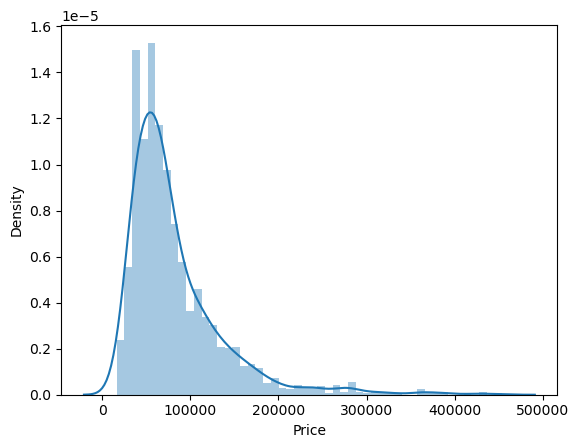

In [34]:
sns.distplot(new_df['Price'])

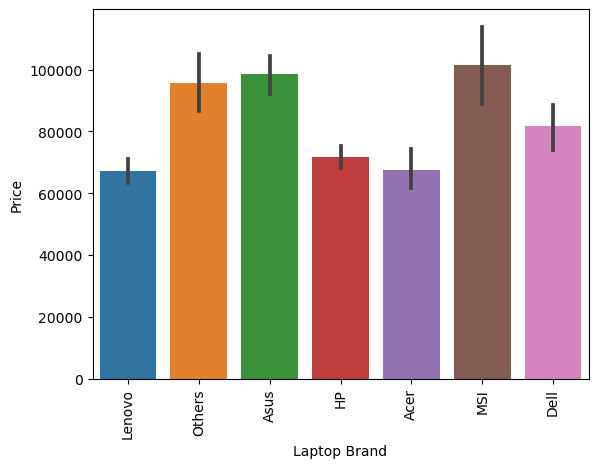

In [35]:
sns.barplot(x=new_df['Laptop Brand'], y=new_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Operating System', ylabel='Price'>

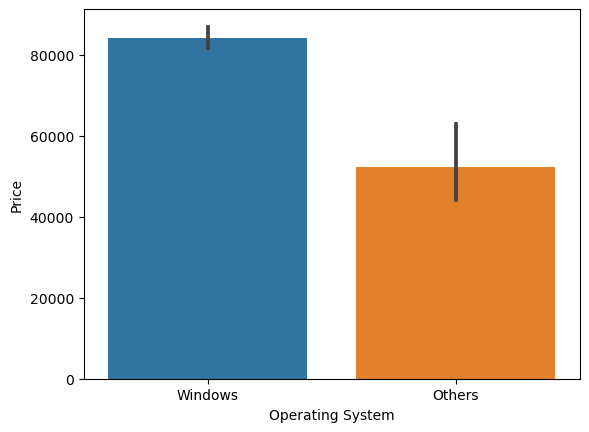

In [36]:
sns.barplot(x=new_df['Operating System'], y=new_df['Price'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

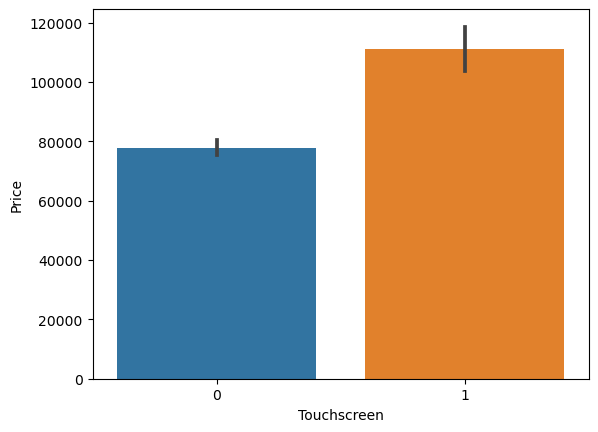

In [37]:
sns.barplot(x=new_df['Touchscreen'], y=new_df['Price'])

<Axes: xlabel='RAM', ylabel='Price'>

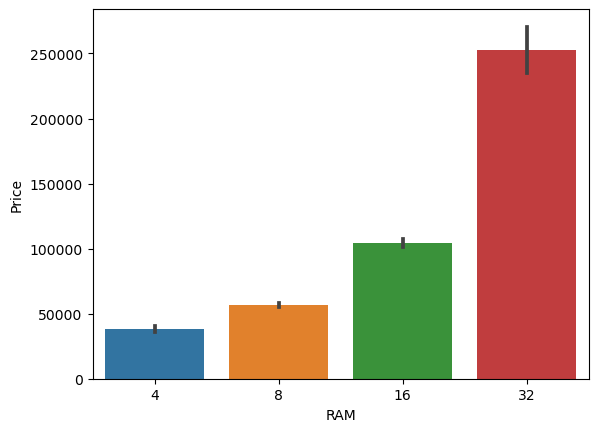

In [38]:
sns.barplot(x=new_df['RAM'], y=new_df['Price'])

<Axes: xlabel='Fingerprint Scanner', ylabel='Price'>

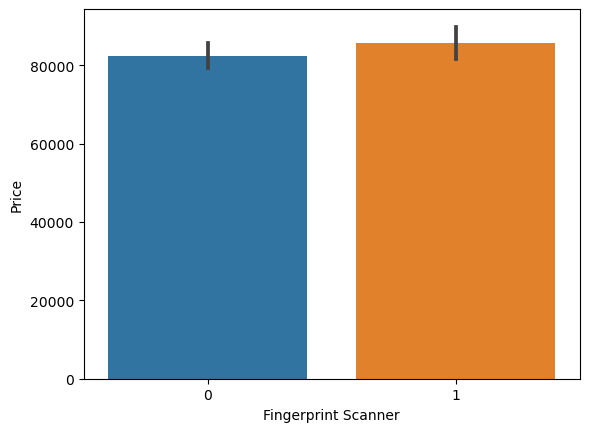

In [39]:
sns.barplot(x=df['Fingerprint Scanner'], y=df['Price'])

<Axes: xlabel='Processor_brand', ylabel='Price'>

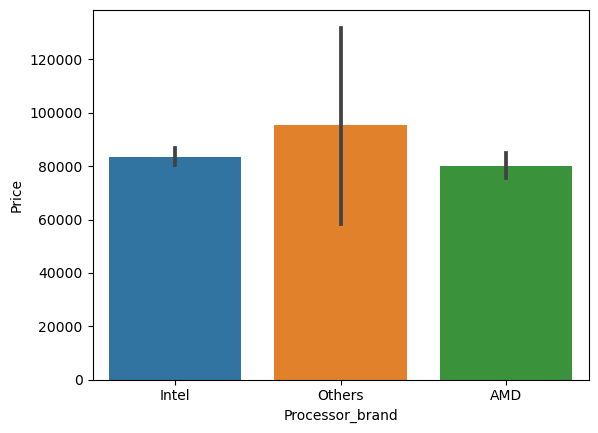

In [40]:
sns.barplot(x=new_df['Processor_brand'], y=new_df['Price'])

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

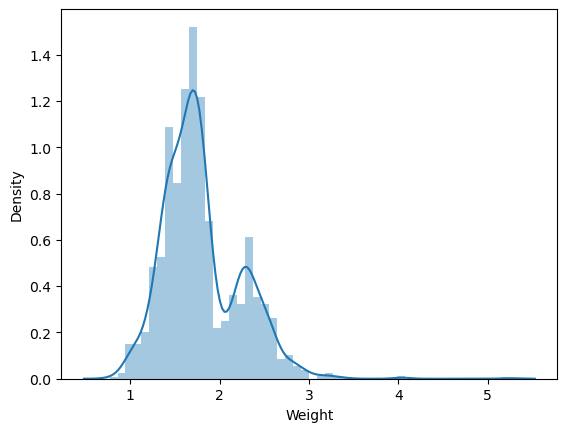

In [41]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

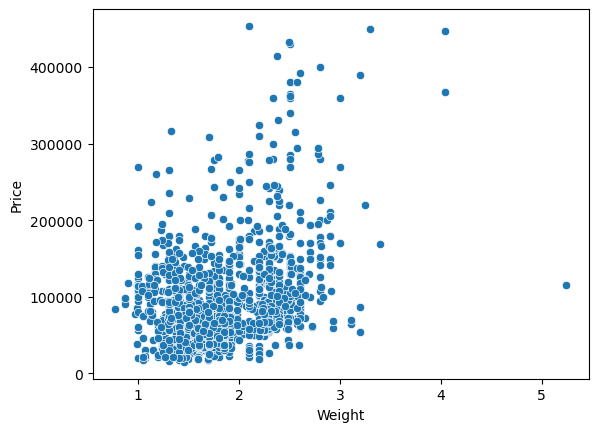

In [42]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

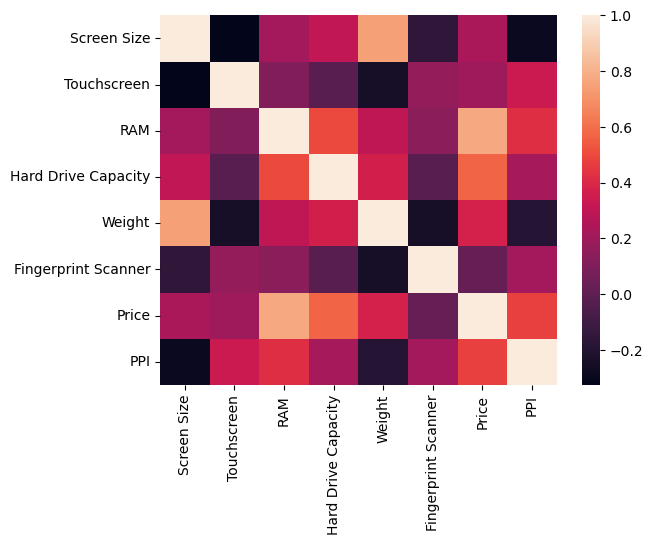

In [43]:
sns.heatmap(df.corr())

/var/folders/vj/jjf_2ry50gb_yk_b656fkj800000gn/T/ipykernel_2985/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

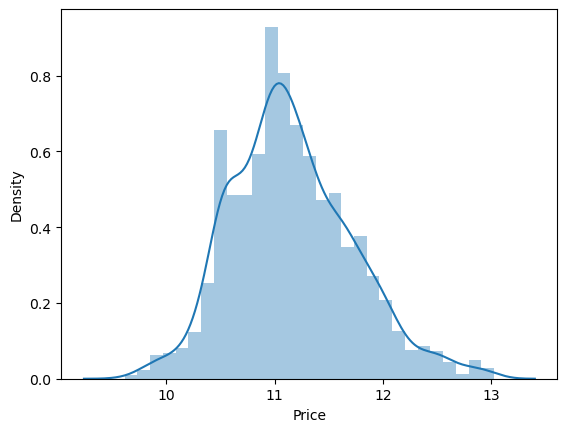

In [44]:
sns.distplot(np.log(df['Price']))

In [45]:
X = new_df.drop(columns = ['Price'])
y = np.log(new_df['Price'])

In [46]:
X

,Laptop Brand,Processor_brand,Operating System,RAM,Hard Drive Capacity,Screen Size,Touchscreen,Weight,PPI
0,Lenovo,Intel,Windows,8,512,large,0,Lite,141.211998
1,Others,Intel,Windows,8,256,Medium,0,Lite,185.428351
2,Asus,Intel,Windows,8,512,large,0,Average,141.211998
3,Lenovo,Intel,Windows,8,512,large,0,Lite,141.211998
4,Others,Others,Others,8,256,Medium,0,Lite,226.983005
...,...,...,...,...,...,...,...,...,...
2022,Asus,Intel,Windows,16,512,Medium,1,Lite,157.350512
2024,Acer,AMD,Windows,16,1024,Medium,0,Lite,157.350512
2026,Lenovo,AMD,Windows,8,512,Medium,1,Lite,157.350512
2029,HP,AMD,Windows,4,512,large,0,Lite,141.211998


In [47]:
y

0       10.490996
1       10.518646
2       10.896554
3       10.505068
4       11.314353
          ...    
2022    11.652600
2024    11.512825
2026    11.054060
2029    10.542443
2034    12.016539
Name: Price, Length: 1862, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [49]:
X_train

,Laptop Brand,Processor_brand,Operating System,RAM,Hard Drive Capacity,Screen Size,Touchscreen,Weight,PPI
1410,Lenovo,Intel,Windows,8,256,large,0,Lite,141.211998
1451,Dell,AMD,Windows,8,512,large,0,Average,141.211998
1762,HP,Intel,Windows,8,512,Medium,0,Lite,157.350512
1492,Dell,Intel,Windows,8,512,Medium,0,Lite,157.350512
1382,HP,AMD,Windows,16,512,large,0,Average,136.826532
...,...,...,...,...,...,...,...,...,...
1705,Acer,Intel,Windows,8,512,Medium,0,Lite,157.350512
1757,Asus,AMD,Windows,32,1024,Medium,1,Lite,168.966826
571,Dell,AMD,Windows,8,256,large,0,Average,141.211998
607,Asus,Intel,Windows,8,512,Medium,0,Lite,157.350512


In [50]:
X_train['Weight'].value_counts()

Lite       815
Average    612
Heavy      155
Name: Weight, dtype: int64

In [51]:
X_test['Weight'].value_counts()

Lite       154
Average    106
Heavy       20
Name: Weight, dtype: int64

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [56]:
class CustomOneHotEncoder(OneHotEncoder):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit(self, X, y=None):
        self.categories_ = []
        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            self.categories_.append(unique_values)
        return super().fit(X, y)

### Linear Regression

In [58]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6460703738027436
MAE 0.23517614274421247


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Ridge Regression

In [59]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6524789317039923
MAE 0.2339859500268804


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Lasso Regression 

In [60]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6506326504706794
MAE 0.2338257444342514


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### KNN

In [61]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6685860806221293
MAE 0.22805460485050882


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [62]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6907758865125526
MAE 0.2096476721160848


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### SVM

In [63]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.6493247630344656
MAE 0.22120174387356606


### Adaboost

In [64]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6228355167926882
MAE 0.25026785506216265


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Gradient Boost

In [65]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7255803613636342
MAE 0.19764243585154248


### XGBoost

In [66]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7450596539669803
MAE 0.18742128763617685


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Stacking

In [67]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.733329713087117
MAE 0.20091003859067744


### Random Forest

In [68]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7312120564181586
MAE 0.1966100945818036


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Voting Regressor

In [69]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7438064885335608
MAE 0.19507119432537942


### Extra Trees

In [74]:
categorical_columns = [0, 1, 2, 5, 6, 7]
numeric_columns = [col for col in range(X_train.shape[1]) if col not in categorical_columns]

categorical_transformer = OneHotEncoder(sparse=False, drop='first')
numeric_transformer = 'passthrough'  

step1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'
)

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.746702322791168
MAE 0.1874027031525272
